# Principal Component Analysis - Handwritten Digit Recognision

#### Bibliotecile folosite

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'matplotlib'


#### Incarcarea si divizarea setului de date Digits inclus in biblioteca scikit-learn. Setul de date Digits conține 1797 de imagini cu cifre scrise de mână de la 0 la 9. Fiecare imagine este reprezentată printr-un vector de pixeli, iar setul conține 64 de caracteristici pentru fiecare imagine (8x8 pixeli). Datele sunt impartite intr-un set de antrenare si un set de testare (20% din date for fi rezervate prentru testare)

In [18]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)
print('X_train shape is: ', X_train.shape)
print('Y_train shape is: ', y_train.shape)
print('X_test shape is: ', X_test.shape)
print('Y_test shape is: ', y_test.shape)

X_train shape is:  (1437, 64)
Y_train shape is:  (1437,)
X_test shape is:  (360, 64)
Y_test shape is:  (360,)


#### Se aplică o scalare standard (normalizare) asupra datelor.

In [19]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

#### Acest cod efectuează analiza componentelor principale (PCA) pe seturile de date de testare și de antrenament normalizate.


In [20]:
n_components = 64  # You can adjust this parameter
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

#### Se vizualizează un grafic în care pe axa x avem numărul de componente principale, iar pe axa y avem procentul cumulat din varianța explicată. Cu cât numărul de componente principale crește, cu atât mai multă varianță explicată este reținută. 


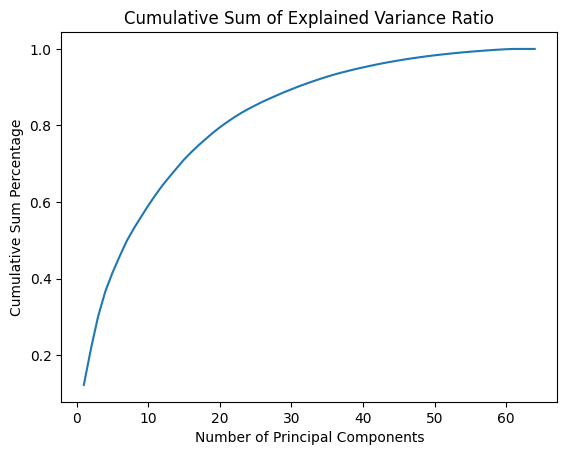

In [21]:
eig_values_cumsum = np.cumsum(pca.explained_variance_)

# Plot the cumulative sum percentage
plt.plot(range(1, n_components + 1), eig_values_cumsum / eig_values_cumsum[-1])
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Sum Percentage')
plt.title('Cumulative Sum of Explained Variance Ratio')
plt.show()

#### Antrenam un clasificator (K-nearest neighbors in acest exemplu)


In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Evaluarea performanței clasificatorului pe setul de testare și afișarea acurateții rezultate.


In [23]:
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.94%


#### Afisarea unor imagini din setul de testare, împreună cu etichetele reale și cele prezise.

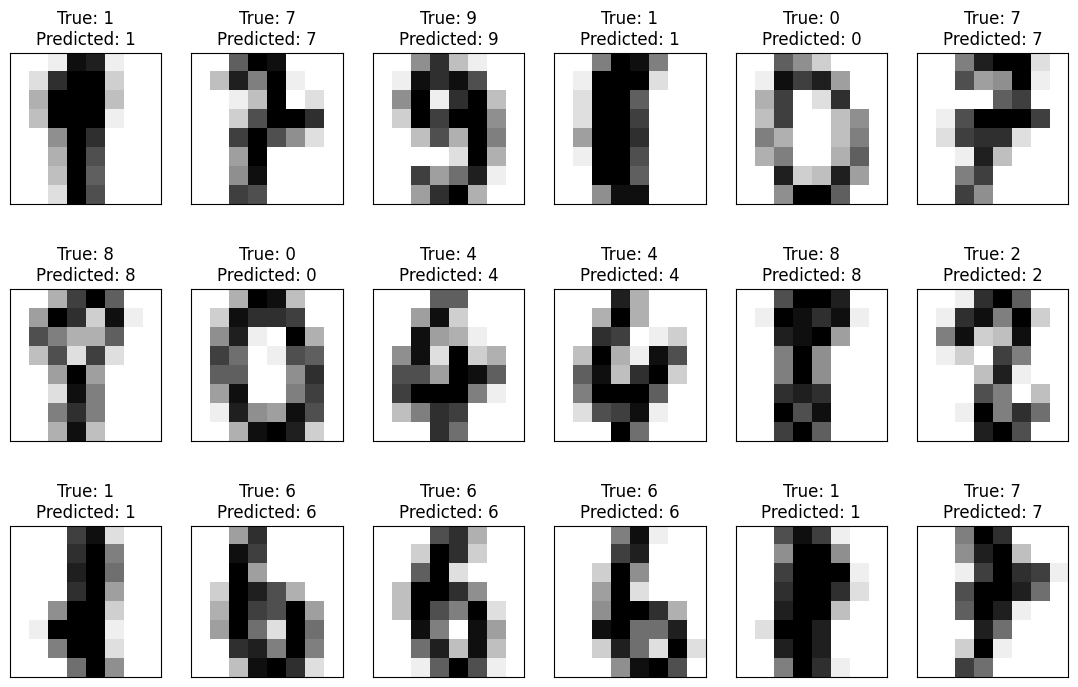

In [24]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)  # Use reversed grayscale colormap
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

n_row = 3
n_col = 6
sample_images = X_test[:n_row * n_col]
true_labels = y_test[:n_row * n_col]
predicted_labels = y_pred[:n_row * n_col]
titles = [f'True: {true}\nPredicted: {pred}' for true, pred in zip(true_labels, predicted_labels)]

plot_gallery(sample_images, titles, 8, 8)
plt.show()